# Video: Visualizing Linear Discriminant Analysis

This video illustrates linear discriminant analysis using one and two dimensional multivariate normal distributions.

Script:
* Let's take a look at how linear discriminant analysis works in the ideal case where the data follows the assumed multivariate normal distributions.
* I will show you examples of linear discriminant analysis in 1 and 2 dimensions with synthetic data for clean examples.
* Then I will apply linear discriminant analysis to splitting the Adelie and Chinstrap penguins that were harder to distinguish when we were looking at random projections.


In [ ]:
import numpy as np
import pandas as pd

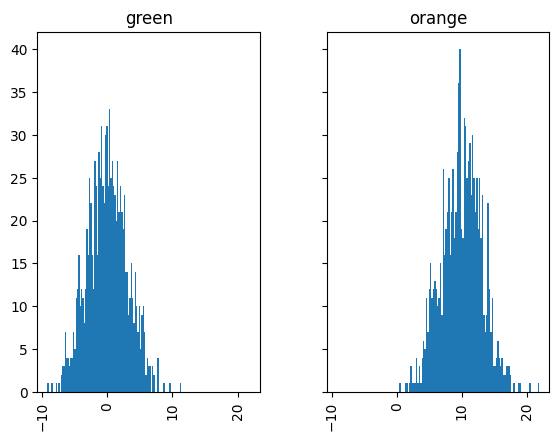

In [ ]:
X_1d = pd.DataFrame({"x": np.concatenate([np.random.normal(size=(1000,), loc=0.0, scale=3),
                                          np.random.normal(size=(1000,), loc=10.0, scale=3)])})
y_1d = np.concatenate([np.full(shape=(1000,), fill_value=0),
                       np.full(shape=(1000,), fill_value=1)])
colors_1d = ["green" for _ in range(1000)] + ["orange" for _ in range(1000)]

X_combined = X_1d.copy()
X_combined["color"] = colors_1d
X_combined.hist(by="color", sharex=True, sharey=True, bins=100)
None

Script:
* I setup this data ahead of time.
* There are two classes here.
* The first is shown on the left, and is centered at zero.
* The second is shown on the right, and is centered at ten.
* Both have a standard deviation of five, so they have substantial overlap.

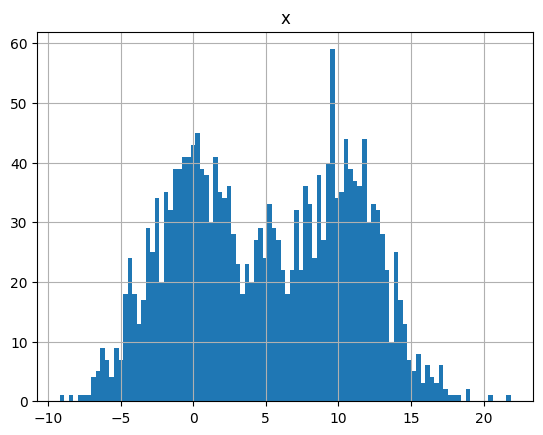

In [ ]:
X_1d.hist(bins=100)
None

Script:
* Let's do the linear discriminant analysis now.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda_1d = LinearDiscriminantAnalysis()
lda_1d.fit(X_1d, y_1d)

LinearDiscriminantAnalysis()

Script:
* The linear discriminant analysis computes the means and covariances for both distributions, and remaps all the data points to a line between the centers of the two distributions.
* Let's see how that data lines up.

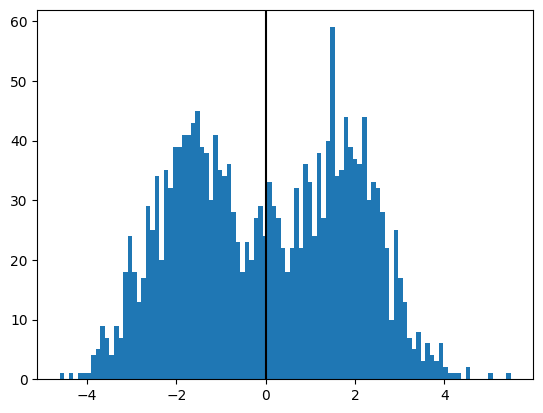

In [ ]:
plt.hist(lda_1d.transform(X_1d), bins=100)
plt.gca().axvline(x=0, color="k")
None

Script:
* This looks similar to the original histogram, but now zero is between the two peaks of the histogram.
* Let's check the predictions along this line.

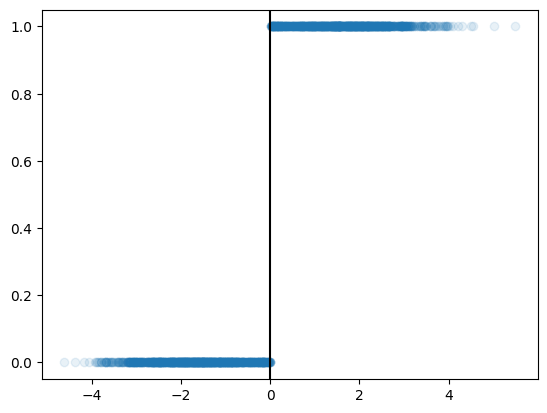

In [ ]:
plt.gca().axvline(x=0, color="k")
plt.scatter(lda_1d.transform(X_1d), lda_1d.predict(X_1d), alpha=0.1)
None

Script:
* You can see that the predictions switch from the first class to the second class when the transformed score crosses zero.
* Let's look at the probabilities to see the confidence of those predictions.

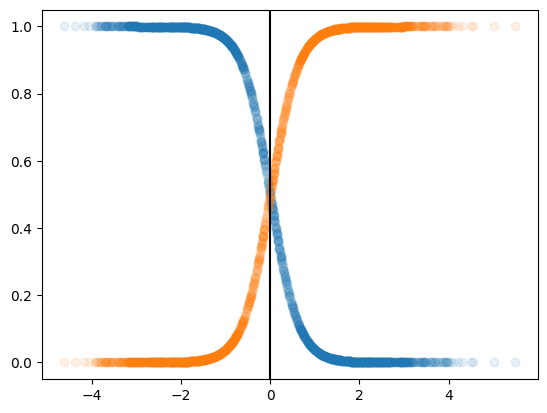

In [ ]:
plt.gca().axvline(x=0, color="k")
plt.scatter(lda_1d.transform(X_1d), lda_1d.predict_proba(X_1d)[:,0], alpha=0.1)
plt.scatter(lda_1d.transform(X_1d), lda_1d.predict_proba(X_1d)[:,1], alpha=0.1)
None

Script:
* Those predictions are pretty one-sided except for a small range, roughly -1 to 1, of the transformed scores.
* Let's look at those predictions with the original input numbers.

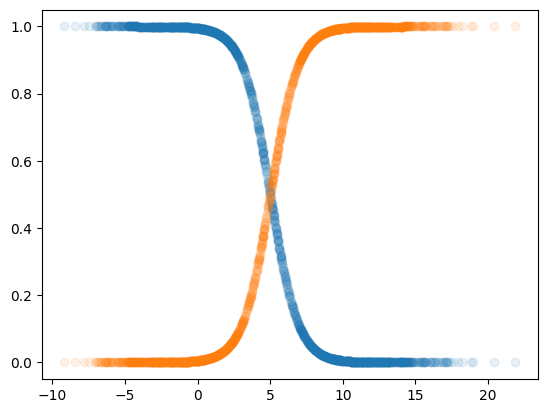

In [ ]:
plt.scatter(X_1d, lda_1d.predict_proba(X_1d)[:,0], alpha=0.1)
plt.scatter(X_1d, lda_1d.predict_proba(X_1d)[:,1], alpha=0.1)
None

Script:
* That looks pretty well lined up with the transition happening half way between the class means.
* Let's look at a 2 dimensional example.

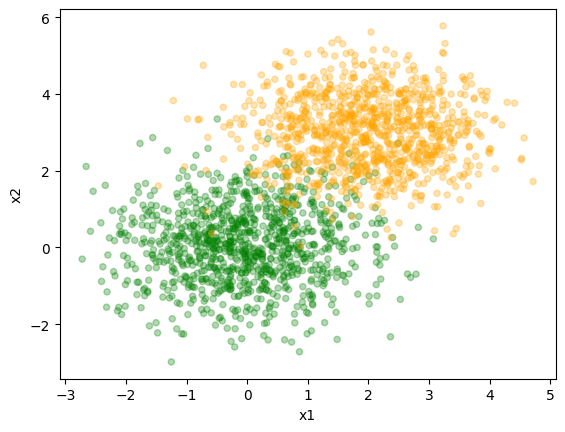

In [ ]:
X_2d = pd.DataFrame({"x1": np.concatenate([np.random.normal(size=(1000,), loc=0.0, scale=1),
                                           np.random.normal(size=(1000,), loc=2.0, scale=1)]),
                     "x2": np.concatenate([np.random.normal(size=(1000,), loc=0.0, scale=1),
                                           np.random.normal(size=(1000,), loc=3.0, scale=1)])})
y_2d = np.concatenate([np.full(shape=(1000,), fill_value=0),
                       np.full(shape=(1000,), fill_value=1)])
colors_2d = ["green" for _ in range(1000)] + ["orange" for _ in range(1000)]

X_2d.plot.scatter("x1", "x2", c=colors_2d, alpha=0.3)
None

Script:
* We again have two classes, now with the same multivariate normal distributions and different means.
* Let's run this data through linear discriminant analysis too.

In [ ]:
lda_2d = LinearDiscriminantAnalysis()
lda_2d.fit(X_2d, y_2d)


LinearDiscriminantAnalysis()

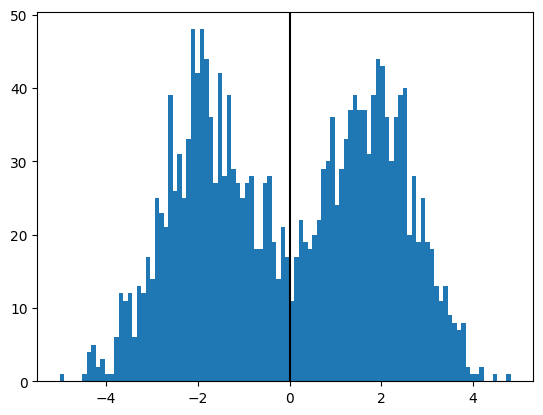

In [ ]:
plt.hist(lda_2d.transform(X_2d), bins=100)
plt.gca().axvline(x=0, color="k")
None

Script:
* We see again the transformed data showing two peaks, with zero in between them.

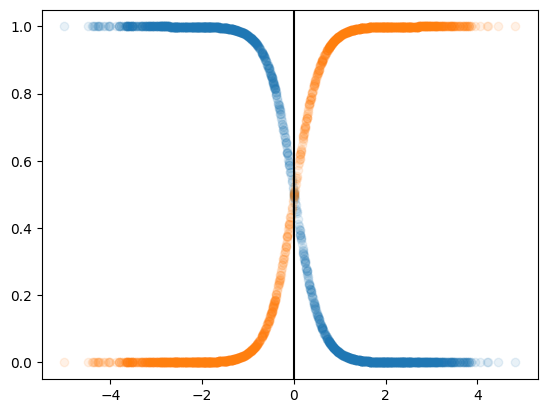

In [ ]:
plt.scatter(lda_2d.transform(X_2d), lda_2d.predict_proba(X_2d)[:,0], alpha=0.1)
plt.scatter(lda_2d.transform(X_2d), lda_2d.predict_proba(X_2d)[:,1], alpha=0.1)
plt.gca().axvline(x=0, color="k")
None

Script:
* The probability graph looks the same in transformed space.
* Let's look at the probabilities in two dimensions.

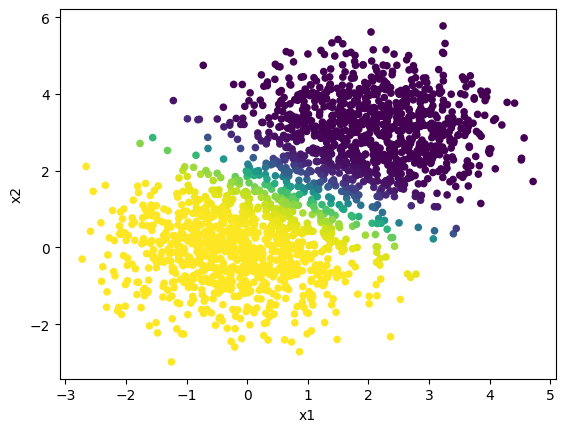

In [ ]:
X_2d.plot.scatter("x1", "x2", c=lda_2d.predict_proba(X_2d)[:,0])
None

Script:
* The points are now shaded according to the probability estimate from the linear discriminant analysis.
* There are two solid, confident areas corresponding to certainty in one class or the other.
* And in the middle, you can see a striped band where the probabilities are less certain.
* And just to spot check, let's look at the original classes to make sure that these line up.

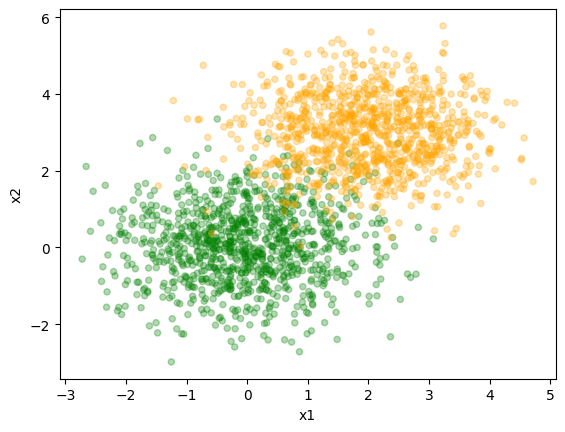

In [ ]:
X_2d.plot.scatter("x1", "x2", c=colors_2d, alpha=0.3)
None

Script:
* Linear discriminant analysis gave us a simple rule to classify these datasets with the assumption that their data came from multivariate normal distributions.
* Let's look at how this works on real data.
* Let's look at the Palmer Penguins dataset.
* And to keep things simple, even though linear discriminant analysis can be applied to more than two classes, I will just look at distinguishing Adelie and Chinstrap penguins.
* Gentoo penguins were easy to distinguish because they are much bigger, but  Adelie and Chinstrap penguins are more similar in size and harder to distinguish from this data.

In [ ]:
penguins_adelie = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/refs/heads/main/data/palmer-penguins-adelie.csv", index_col="Sample Number")
penguins_chinstrap = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx601-examples/refs/heads/main/data/palmer-penguins-chinstrap.csv", index_col="Sample Number")
penguins = pd.concat([penguins_adelie, penguins_chinstrap])

penguins = penguins[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Species']]
penguins = penguins.dropna()

In [ ]:
X_penguins = penguins[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)']]
y_penguins = penguins["Species"] == "Adelie Penguin (Pygoscelis adeliae)"

Script:
* Like the previous video using random projections, the penguin data will be limited to the physical measurements.

In [ ]:
lda_penguins = LinearDiscriminantAnalysis()
lda_penguins.fit(X_penguins, y_penguins)

LinearDiscriminantAnalysis()

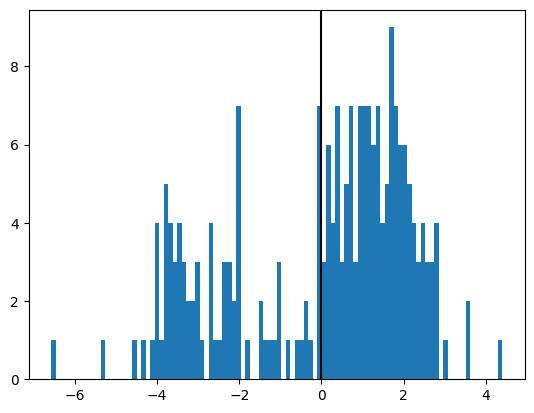

In [ ]:
plt.hist(lda_penguins.transform(X_penguins), bins=100)
plt.gca().axvline(x=0, color="k")
None

Script:
* If we look at the transformed data, there are a lot of penguins mapped right next to zero, and not so many on the left side.
* This is pretty different from the synthetic cases before.
* Let's break that up into different species.

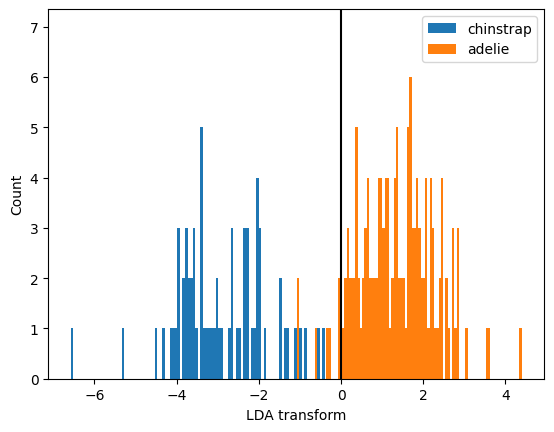

In [ ]:
plt.hist(lda_penguins.transform(X_penguins[y_penguins == 0]), bins=100, label="chinstrap")
plt.hist(lda_penguins.transform(X_penguins[y_penguins == 1]), bins=100, label="adelie")
plt.gca().axvline(x=0, color="k")
plt.legend()
plt.xlabel("LDA transform")
plt.ylabel("Count")
None

Script:
* Now we can see that Adelie penguins are that mass to the right of zero, but a few are on the left too.
* Meanwhile, all the Chinstrap penguins are on the left.
* So, all the penguins with positive transformed scores are Adelie penguins.
* And almost all the penguins with negative scores are Chinstrap penguins.
* Bear in mind, there are penguins of both species close to zero.
* It would not be surprising at all to see a few on the wrong side of the line if more data was collected.
* But, this looks like a pretty good way to distinguish these species.
* Let's look at the probabilities.

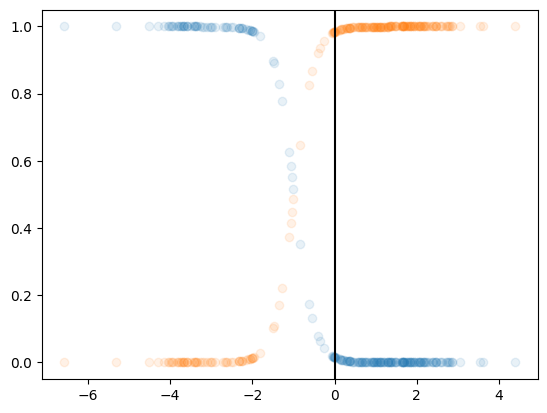

In [ ]:
plt.gca().axvline(x=0, color="k")
plt.scatter(lda_penguins.transform(X_penguins), lda_penguins.predict_proba(X_penguins)[:,0], alpha=0.1)
plt.scatter(lda_penguins.transform(X_penguins), lda_penguins.predict_proba(X_penguins)[:,1], alpha=0.1)
None

Script:
* This probability chart is a bit different from our nice clean synthetic cases.
* The threshold at zero is not where the probability curves cross each other.
* Though note that range was where the two species were mixed up above.
* If you use the thresholded score, there are very few mistakes.
* And if you look at the probabilities, it is clear where there is more uncertainty.
* Looks like a good model.
